<a href="https://colab.research.google.com/github/RedPunk77/-correlation-calculation-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%5Bhomework_4_2_%5Dgame_of_thrones_prediction_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

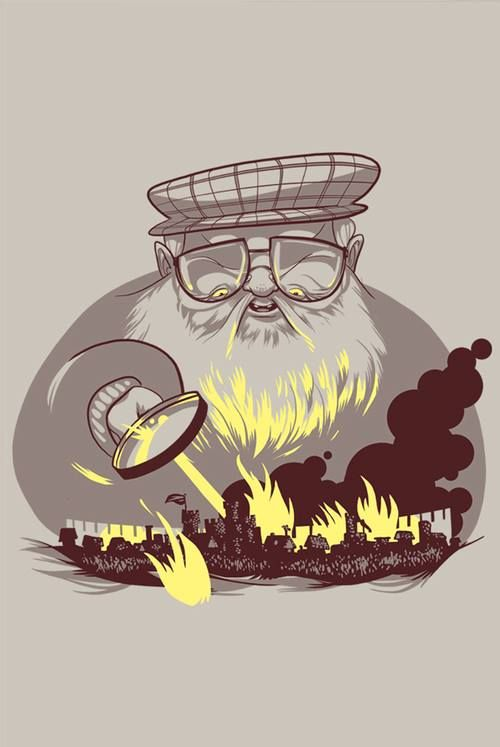

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 70.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 82.9MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("game_of_thrones_train.csv", index_col='S.No')
teest = pd.read_csv("game_of_thrones_test.csv", index_col='S.No')
#df.info()
teest.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
#df.dropna(inplace=True)
df

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


### **Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
df.insert(len(df.columns) - 1, "isPopular", 1)
df['isPopular'] = (df['popularity'] > 0.5).astype(int)
df.insert(len(df.columns) - 1, "boolDeadRelations", 1)
df['boolDeadRelations'] = (df['numDeadRelations'] > 0).astype(int)
df.head()

,name,title,male,culture,house,book1,book2,book3,book4,book5,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,0,0,0,0,0,0,NaN,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,NaN,House Swyft,0,0,0,1,0,1,NaN,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,NaN,House Arryn,0,0,0,0,0,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,29.0,0,0.043478,1,0,0


In [ ]:
# Подсказка
df.head()
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
culture_map = {name: culture for name, cultures in cult.items() for culture in cultures}
df['culture'] = df['culture'].replace(culture_map)
df

,name,title,male,culture,house,book1,book2,book3,book4,book5,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
#df.drop(columns=['dateOfBirth', 'mother', 'father', 'heir', 'isMarried', 'spouse','isAliveMother', 'isAliveFather','isAliveHeir','isAliveSpouse'], inplace=True)
df.drop(columns=['name'])
df

,name,title,male,culture,house,book1,book2,book3,book4,book5,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,0,0,0,0,0,0,NaN,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,NaN,House Swyft,0,0,0,1,0,1,NaN,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,NaN,House Arryn,0,0,0,0,0,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,1,0,1,1,0,1,NaN,0,0.160535,1,0,0
1554,Masha Heddle,NaN,0,NaN,NaN,1,1,0,0,0,0,NaN,0,0.040134,0,0,0
1555,Matthos Seaworth,NaN,1,NaN,House Seaworth,0,1,1,1,1,0,NaN,0,0.076923,0,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

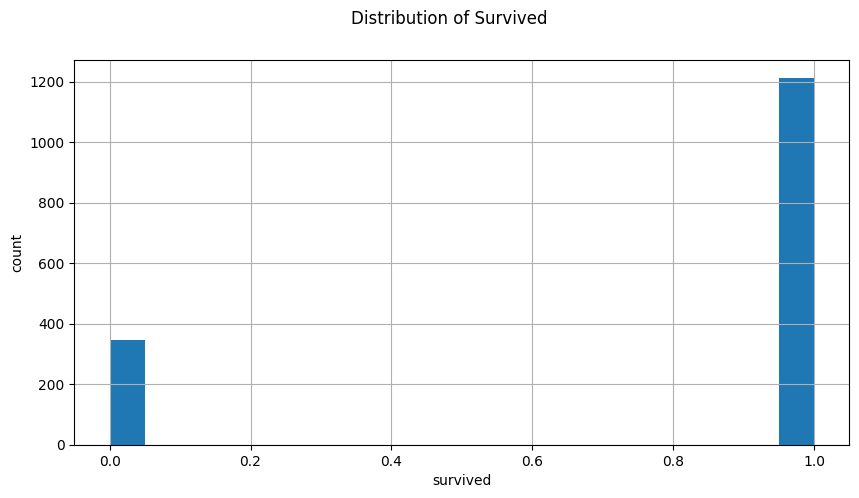

In [ ]:
#df.isna().sum()
#x = df.drop(['isAlive'], axis=1)
#Y = df['isAlive']
#x.drop(columns=['name'], inplace=True)
plt.figure(figsize = (10, 5))
Y.hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('survived')
plt.suptitle('Distribution of Survived')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#categorical_columns = ['title', 'culture', 'house']
#categorical_features = x[categorical_columns]
#unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
#label_encoding = LabelEncoder()
#for column in unprocessed_cat_features:
  #x[column] = label_encoding.fit_transform(df[column])
#mean_age = x['age'].mean()
#x['age'].fillna(value=mean_age, inplace=True)
corrmat = x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

,isAlive
S.No,
1,0
2,1
3,1
4,0
5,1
...,...
1553,1
1554,0
1555,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

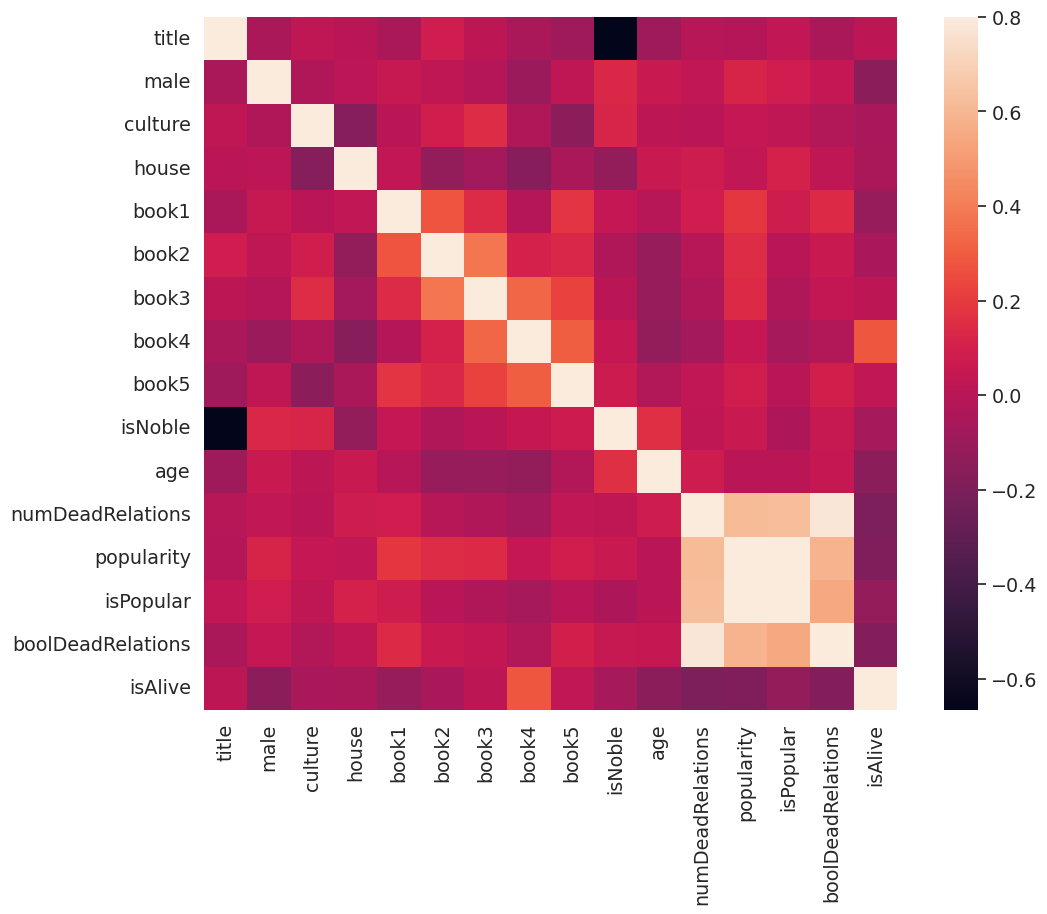

In [ ]:
tmp = pd.concat([x, Y], axis=1)
corrmat = tmp.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = x
y = Y


,isAlive
S.No,
1,0
2,1
3,1
4,0
5,1
...,...
1553,1
1554,0
1555,0


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

312

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
#LogisticRegression
logistic_regression = LogisticRegression(C=1)
logistic_regression.fit(X_train, y_train)
y1_pred = logistic_regression.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y2_pred = decision_tree_classifier.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
#SVC
svc=SVC()
svc.fit(X_train, y_train)
y3_pred = svc.predict(X_test)

In [ ]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y4_pred = knn.predict(X_test)

In [ ]:
#GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y5_pred = gauss.predict(X_test)

In [ ]:
#GaussianPC
gauss2 = GaussianProcessClassifier()
gauss2.fit(X_train, y_train)
y6_pred = gauss2.predict(X_test)

In [ ]:
#ADA
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y7_pred = ada.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
#Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y8_pred = forest.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
#linear_regression
y1_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y1_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7853


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
#decision_tree_classifier
y2_pred = decision_tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y2_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7564


In [ ]:
#SVC
y3_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y3_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


In [ ]:
#KNN
y4_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y4_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


In [ ]:
#GaussianNB
y5_pred = gauss.predict(X_test)
accuracy = accuracy_score(y_test, y5_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


In [ ]:
#GaussianPC
y6_pred = gauss2.predict(X_test)
accuracy = accuracy_score(y_test, y6_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7596


In [ ]:
#ADA
y7_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y7_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


In [ ]:
#Forest -> BEST
y8_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y8_pred)
print("Accuracy : %.4f" % accuracy)
len(y8_pred)

Accuracy : 0.8205


312

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("submission.csv", index_col='S.No')
len(submission)

389

In [ ]:
submission = pd.DataFrame(y8_pred)

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)